<a href="https://colab.research.google.com/github/essalhihayat9152encg-prog/data-science-/blob/main/ESSALHI_Hayat_TP_inynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [6]:
from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

In [8]:
import pandas as pd
import numpy as np

link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df = pd.read_csv(link, delimiter=";")
print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
display(df.head())


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples ========= 



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Set the number of neighbors
k = 3

# Initialize the KNeighborsClassifier model
clf = KNeighborsClassifier(n_neighbors = k)

# Fit the model on the training data, reshaping y_train to a 1D array
clf.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split

# First split: Separate data into a temporary training/validation set and a test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, shuffle=True, test_size=1/3, stratify=y)

# Second split: Divide the temporary training/validation set into final training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, shuffle=True, test_size=0.5, stratify=y_train_val)

This splitting strategy results in approximately:
*   **Training set:** 1/3 of the original data
*   **Validation set:** 1/3 of the original data
*   **Test set:** 1/3 of the original data

This ensures that each set has a similar distribution of target classes as the original dataset due to the `stratify` parameter.

/tmp/ipython-input-1303025866.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X.columns, rotation=90) # Fixed the UserWarning here by using X.columns


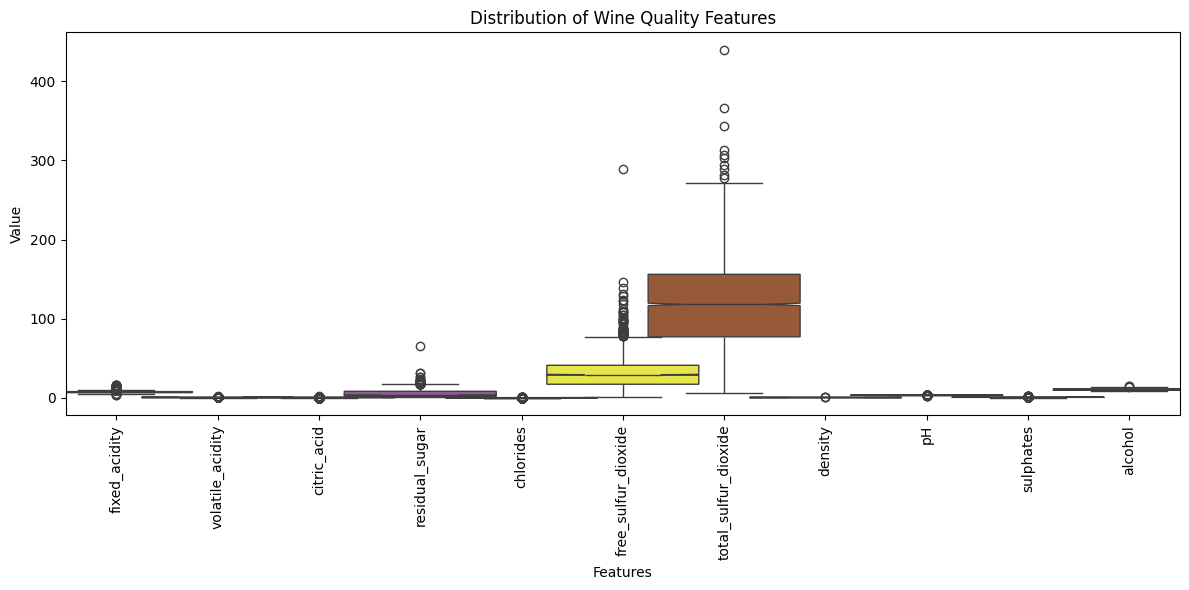

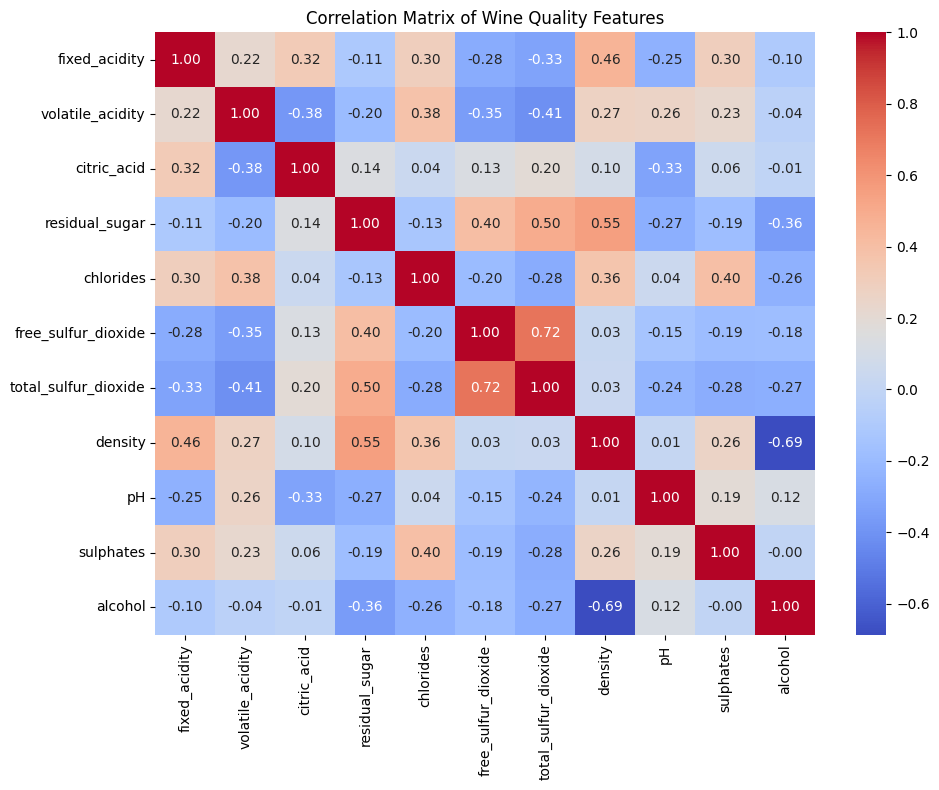

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for feature distributions
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.boxplot(data=X, orient="v", palette="Set1", width=1.5, notch=True, ax=ax)
ax.set_xticklabels(X.columns, rotation=90) # Fixed the UserWarning here by using X.columns
ax.set_title('Distribution of Wine Quality Features')
ax.set_xlabel('Features')
ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

# Heatmap for feature correlations
plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Features')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

# Predict the labels of samples in X_val
y_pred_val = clf.predict(X_val)

# Evaluate classification error rate
error_val = 1 - accuracy_score(y_val, y_pred_val)

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)

# Fit the scaler on the training data and transform it
sc.fit(X_train)
X_train_n = sc.transform(X_train)

# Transform the validation data using the same fitted scaler
X_val_n = sc.transform(X_val)

In [22]:
# Get the minimum validation error and its corresponding k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

print(f"Optimal k (k_star): {k_star}")
print(f"Minimum validation error (err_min): {err_min:.4f}")

Optimal k (k_star): 1
Minimum validation error (err_min): 0.5152
